In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

house_df = pd.read_csv('kc_house_data.csv')

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [2]:
#a)

X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]

model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1) 

#Your code:

print(model)

fit = model.fit(X, y)

#Hint: .fit()

LinearRegression(n_jobs=1)


Mean squared error equals: 57947526161.28838
Square root of the mean squared error equals: 240722.92405
Model score: 0.49671


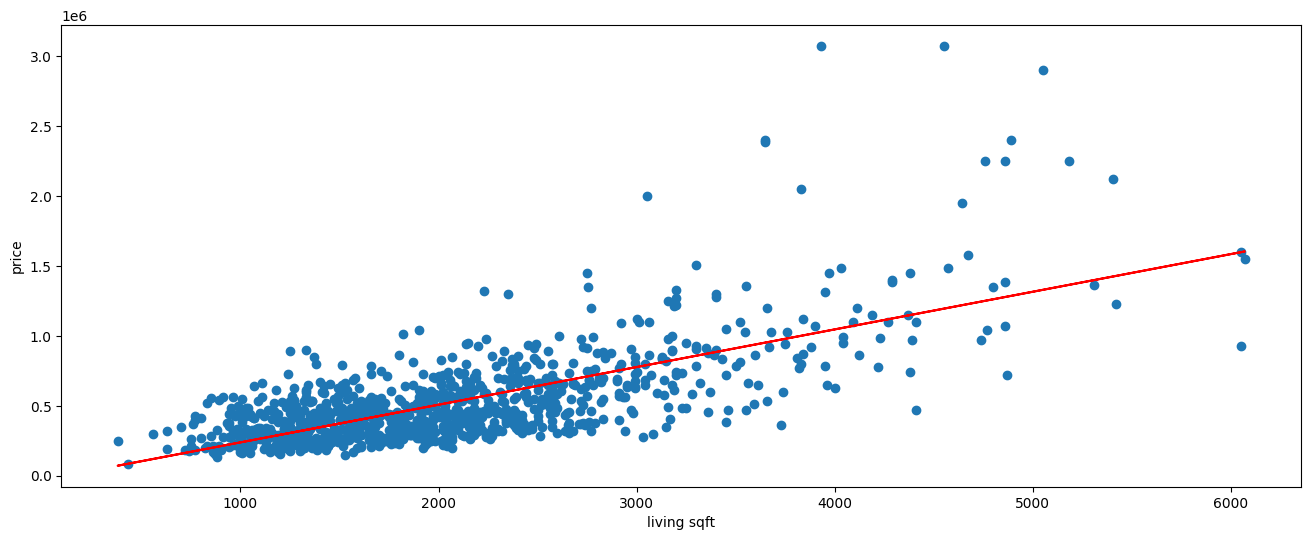

In [3]:
#b)

#Your code:

plt.figure(figsize=(16, 6))

pred_y = fit.predict(X)

plt.scatter(X, y)
plt.plot(X, pred_y, color='red')
plt.xlabel('living sqft')
plt.ylabel('price')

print(f'Mean squared error equals: {mean_squared_error(y, pred_y):.5f}')
print(f'Square root of the mean squared error equals: {np.sqrt(mean_squared_error(y, pred_y)):.5f}')
print(f'Model score: {model.score(X, y):.5f}')
#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

# Note:
    Trained linear model looks fine on this dataset and it achieved a score of 0.49, but we can always do better using non-linear functions. 

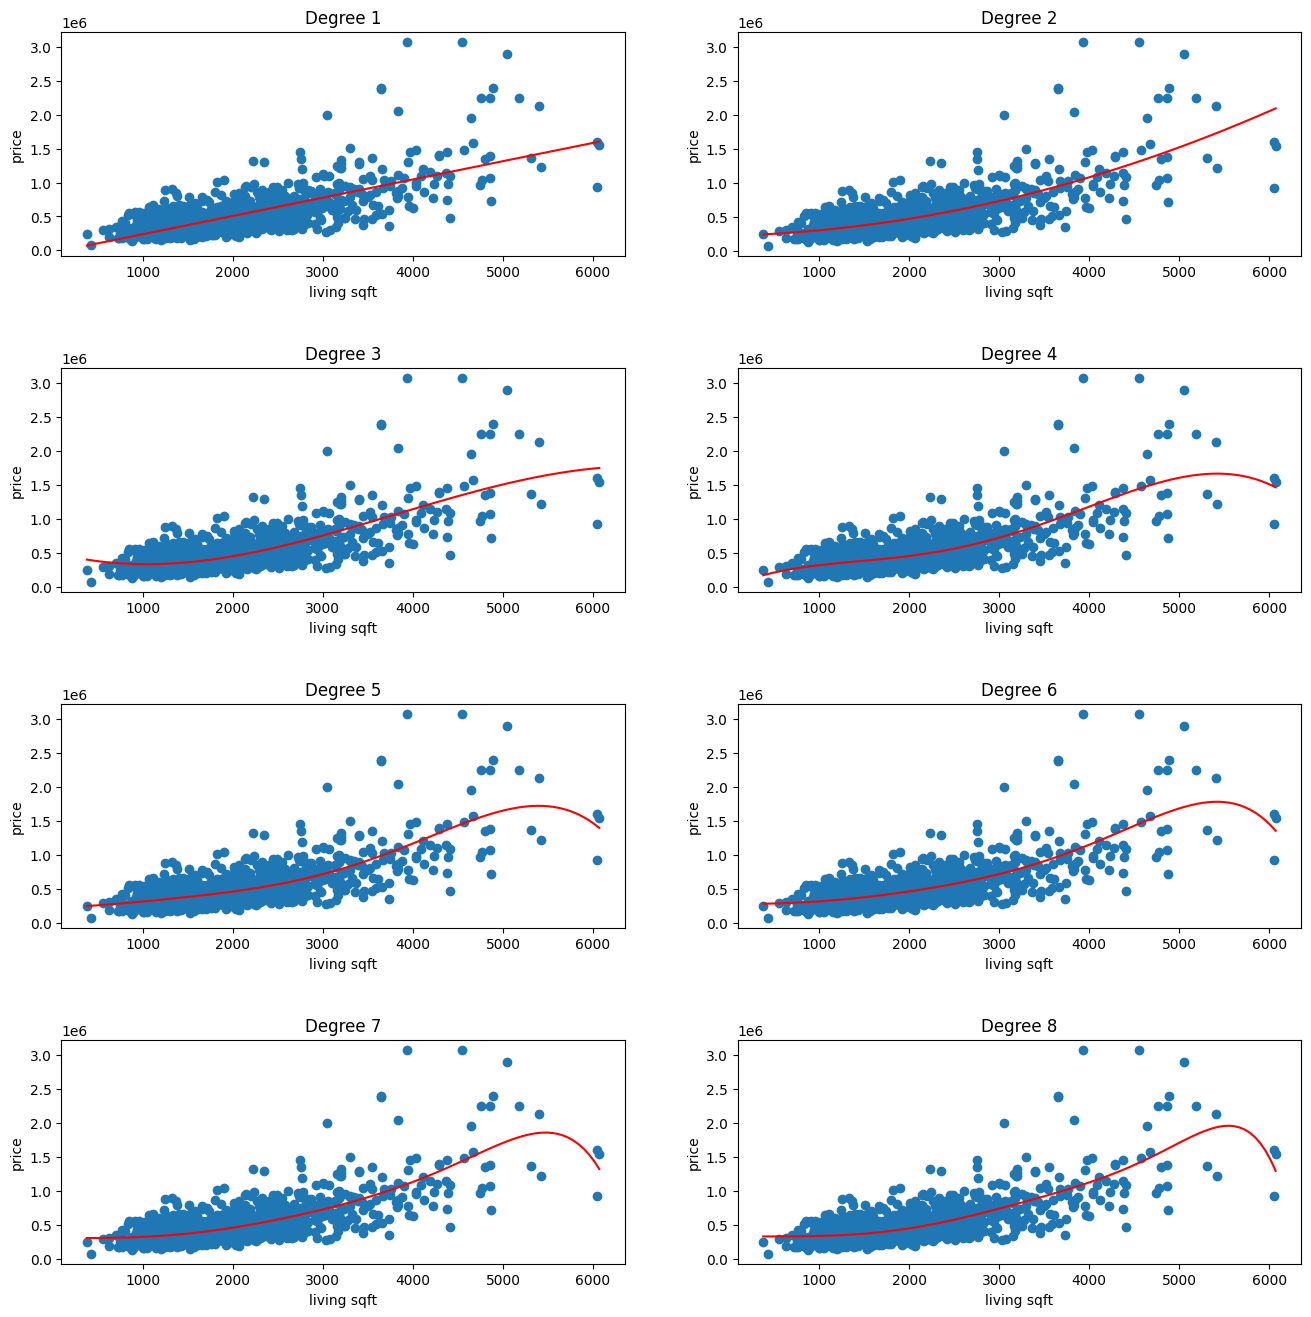

In [4]:
#c)

plt.figure(figsize=(16, 16))

errors = []
true_y = y[:1000]

for order in range(1,9):
    
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)

    #Your code:
    poly_reg_model = LinearRegression()
    pred_y = poly_reg_model.fit(X_order, y).predict(X_order)
    errors.append(mean_squared_error(true_y, pred_y)) 
    plt.subplot(4, 2, order)
    plt.subplots_adjust(hspace=0.5)
    
    plt.scatter(X, y)
    # plt.scatter(X, pred_y, color='red')
    x = np.argsort(X.ravel())
    X_reshaped = X.reshape(-1)
    model = np.poly1d(np.polyfit(X_reshaped[x], pred_y[x], order))
    space = np.linspace(min(X), max(X), 100)
    plt.plot(space, model(space), color='r')
    
    plt.title(f'Degree {order}')
    plt.xlabel('living sqft')
    plt.ylabel('price')

plt.show()

# Note:
    1) We can see that when the degree of the polynomial rises the model is beginning to fall at the end - e.g. for a degree 7 polynomial at the ~5700 living sqft mark we can see a big drop in price point - probably caused by a low amount of points in the dataset with given living sqft. 
    2) On the other hand if we take the linear or quadratic function as a model we anticipate that the price will still have a high growth rate - which doesn't happen in our dataset (the points at 6000 living sqft mark were similar to the 4000 ones).
    3) Taking a polynomial of the 3rd or 4th degree stabilizes the model by quite a bit - making it not blindly increase the price given the living sqft.

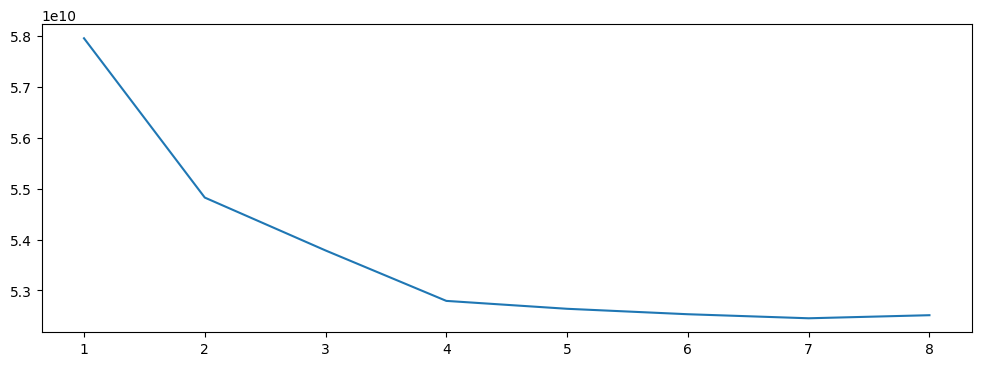

In [5]:
#Your code:
plt.figure(figsize=(12, 4))
plt.plot(np.arange(1, 9, step=1), errors)
plt.show()

# Note:
    1) As I talked in the previous point - the 3rd/4th degree polynomial achieves low mean squared error and it would be more reasonable to pick those 2 instead of a higher degree polynomial model (the error doesn't decrease as much when we compare 4th and 5th degree polynomials)
    2) Picking the quadratic polynomial doesn't seem that good in this scenario.

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

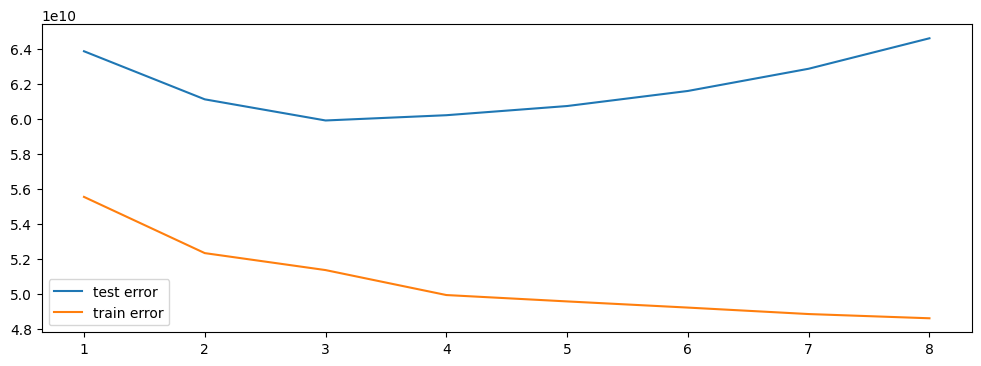

In [6]:
#a)

test_errors, train_errors = [], []
plt.figure(figsize=(12, 4))

for order in range(1,9):
    
    poly = PolynomialFeatures(order, include_bias=False)
    X_order = poly.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)
    poly_reg_model = LinearRegression()
    
    poly_reg_model.fit(X_train, y_train)
    
    test = poly_reg_model.predict(X_test)
    train = poly_reg_model.predict(X_train)
    
    test_errors.append(mean_squared_error(y_test, test))
    train_errors.append(mean_squared_error(y_train, train))

plt.plot(np.arange(1, 9), test_errors, label='test error')
plt.plot(np.arange(1, 9), train_errors, label='train error')

plt.legend()
plt.show()

# Note:
    1) We can see that the test error starts to rise after the 3rd degree polynomial - which means that our model doesn't predict the values as we wanted - but instead it makes sure that the model has the best fit in the train data (which is a bad thing, considering we want to predict the price of the houses).
    2) From the plot of the 2 errors (test and train error) we can see that the perfect candidate for our model would be a 3rd degree polynomial - as it achieves the lowest test error of all polynomials and the train error is sufficent enough.

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

Mean squared error equals: 396407.18896
Square root of the mean squared error equals: 629.60876
Model score: 0.49671


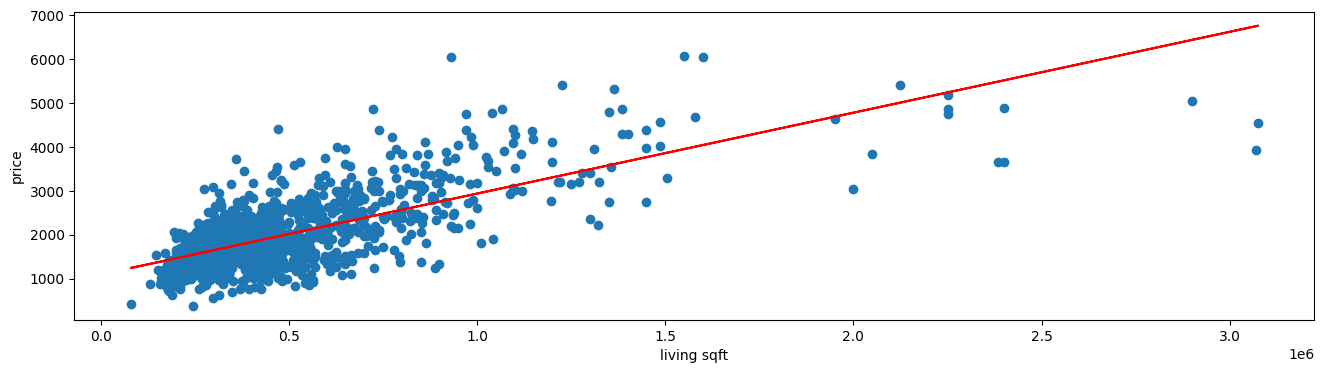

In [7]:
#a)

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

#Your code:

plt.figure(figsize=(16, 4))

model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)
fit = model.fit(X, y)
pred_y = fit.predict(X)

plt.scatter(X, y)
plt.plot(X, pred_y, color='red')
plt.xlabel('living sqft')
plt.ylabel('price')

print(f'Mean squared error equals: {mean_squared_error(y, pred_y):.5f}')
print(
    f'Square root of the mean squared error equals: {np.sqrt(mean_squared_error(y, pred_y)):.5f}')
print(f'Model score: {model.score(X, y):.5f}')

# Note:
    Comparing the mean squared error and the square root of it with the previous model (sqft to price) this model has much lower mse - meaning predicting sqft based on price is better than predicting price for sqft.

Mean squared error equals: 365564.20311
Square root of the mean squared error equals: 604.61906
Model score: 0.53587


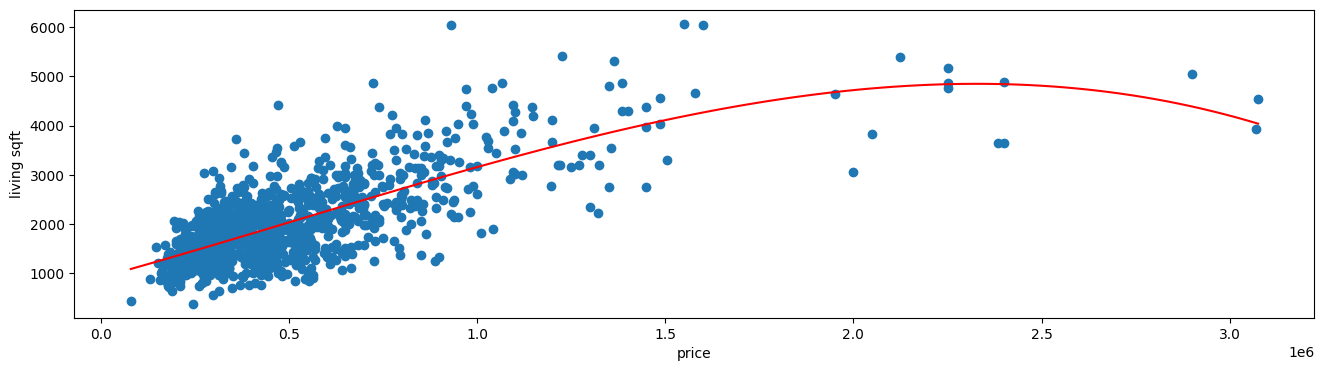

In [8]:
X = house_df.price.values.reshape(-1, 1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

plt.figure(figsize=(16, 4))

poly = PolynomialFeatures(3, include_bias=False)
X_order = poly.fit_transform(X)

model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)
fit = model.fit(X_order, y)
pred_y = fit.predict(X_order)

plt.scatter(X, y)

x = np.argsort(X.ravel())
X_reshaped = X.reshape(-1)
model_poly = np.poly1d(np.polyfit(X_reshaped[x], pred_y[x], 3))
space = np.linspace(min(X), max(X), 100)
plt.plot(space, model_poly(space), color='r')

plt.xlabel('price')
plt.ylabel('living sqft')

print(f'Mean squared error equals: {mean_squared_error(y, pred_y):.5f}')
print(
    f'Square root of the mean squared error equals: {np.sqrt(mean_squared_error(y, pred_y)):.5f}')
print(f'Model score: {model.score(X_order, y):.5f}')

# Note:
    By making the model a polynomial of higher order (3rd in the example above) we improve the model score by 0.039 which is a 7.88% increase. The model improved by quite a lot.

In [9]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


#Your model:

X = house_df[['sqft_living', 'condition', 'grade', 'view']].values.reshape(-1, 4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias=False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.6, random_state=43)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"My model mean squared error equals: {mean_squared_error(y_pred, y_test)}")


Mean squared error equals: 48749247682.69787
My model mean squared error equals: 47144682021.7179


# Note:
    I've swapped the 'sqft_lot' feature for the 'condition' one - as it seemed more reasonable. The model uses: sqft, condition, grade, view and it beats the proposed model by about 3%.